#Caption Generation with Visual Attention

This Jupyter Notebook  imports several Python libraries, including transformers, torch, numpy, matplotlib, and PIL, to generate image captions.

The VisionEncoderDecoderModel is a pre-trained transformer model that performs image captioning. It consists of two sub-models, an encoder for images and a decoder for natural language text. The encoder processes the input image to extract visual features using the Vision Transformer (ViT) architecture, which is a transformer-based neural network architecture that operates directly on image patches. The decoder generates a caption for the input image using the GPT-2 language model, which is a transformer-based neural network architecture that generates natural language text.

The ViTImageProcessor is used to preprocess the input image and convert it into a format that can be fed to the encoder of the VisionEncoderDecoderModel. It takes an image as input, resizes it to a specified size, converts it to a tensor, and performs normalization and standardization. It also splits the image into patches, which are then fed to the encoder of the VisionEncoderDecoderModel.

The GPT2TokenizerFast is used to tokenize the generated caption from the decoder of the VisionEncoderDecoderModel. It takes the generated token IDs and converts them into a human-readable caption by decoding the tokens using the tokenizer's vocabulary.

Together, these components enable the VisionEncoderDecoderModel to perform image captioning with visual attention. The ViT architecture of the encoder allows the model to attend to specific image regions and extract relevant visual features, while the GPT-2 language model of the decoder generates a caption that reflects the image content. By combining visual information with natural language processing, this approach produces more descriptive and accurate captions than traditional captioning approaches.

This Jupyter notebook is based on:

* https://michael-franke.github.io/npNLG/08-grounded-LMs/08c-NIC-pretrained.html
* https://arxiv.org/pdf/1502.03044.pdf 

#### Installing Captum Library

The following line installs version the transformers library.


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Importing
Importing neccessary libraries.

In [ ]:
from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel
from torch.utils.data import Dataset
from torchtext.data import get_tokenizer
import requests
import torch
import numpy as np
from PIL import Image
import pickle

import matplotlib.pyplot as plt
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

#### Setting-up models
The cell uses a pre-trained VisionEncoderDecoderModel that combines a ViT-based image encoder and a GPT-2 language model decoder to perform image captioning. The ViTImageProcessor pre-processes the input image for the encoder, and the GPT2TokenizerFast decodes the generated tokens into a human-readable caption. This approach produces more accurate captions and is more interpretable than traditional captioning models, making it valuable for explainable AI research.






In [ ]:
model_raw = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer       = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

#### Visualization
The show_n_generate function takes an image path, and uses the pre-trained VisionEncoderDecoderModel to generate a caption for the given image. It preprocesses the image using the ViTImageProcessor and then generates the caption using the GPT-2 language model decoder. If greedy is set to True, it uses greedy decoding to generate the caption, otherwise it uses top-k sampling. The function then displays the input image along with the generated caption using matplotlib.

The following lines use this function to generate and display captions for six different images, where the greedy parameter is set to True for all images.

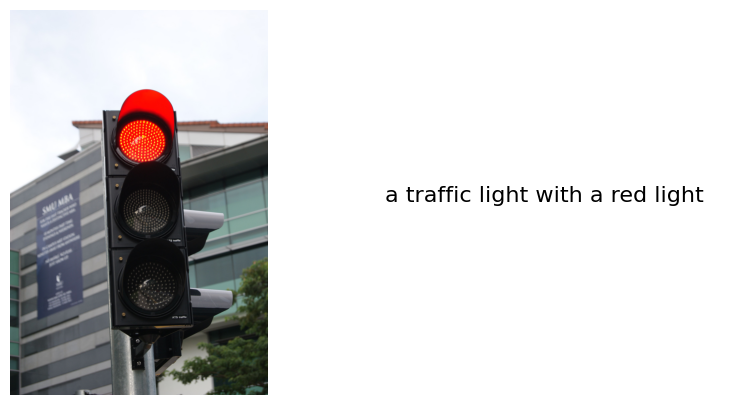

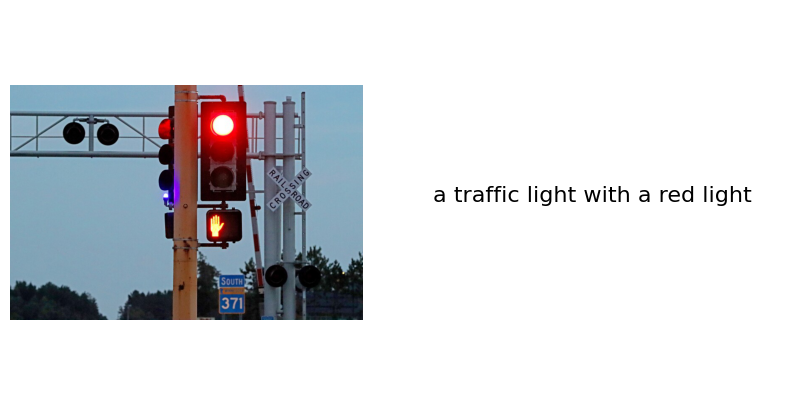

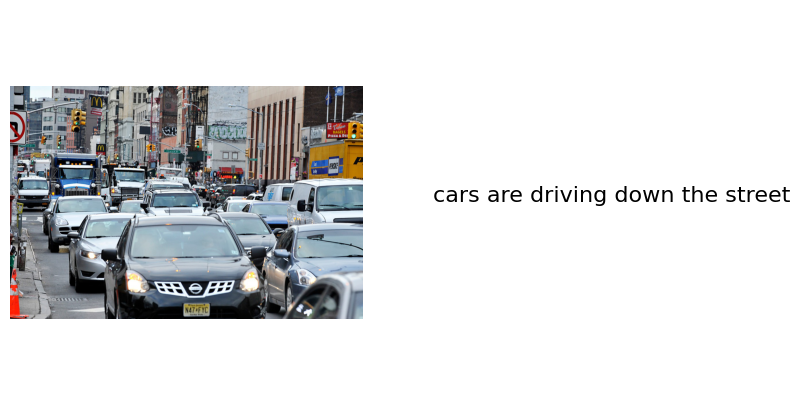

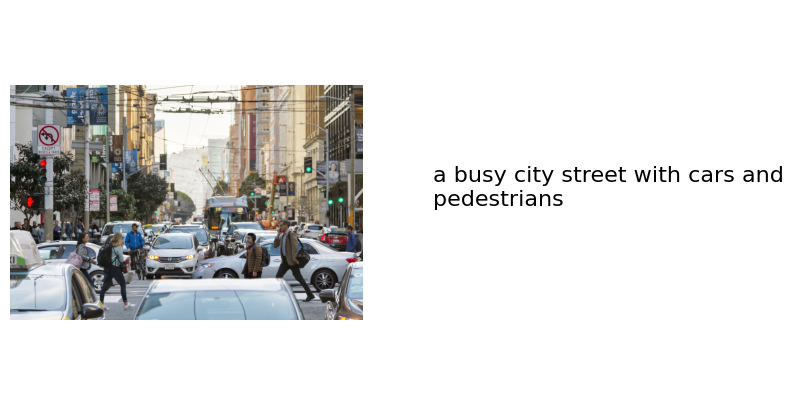

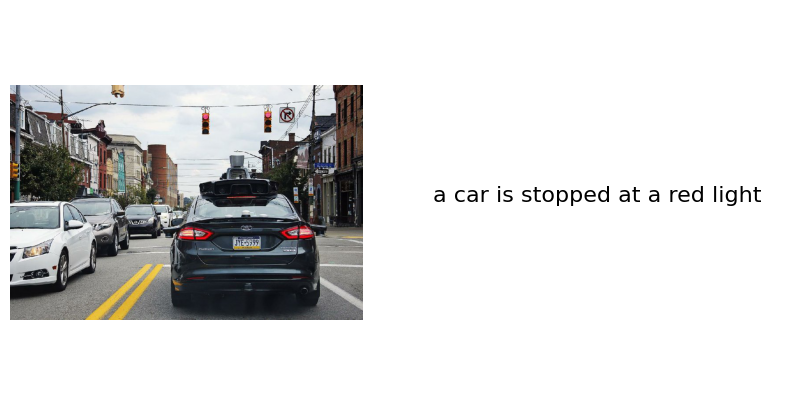

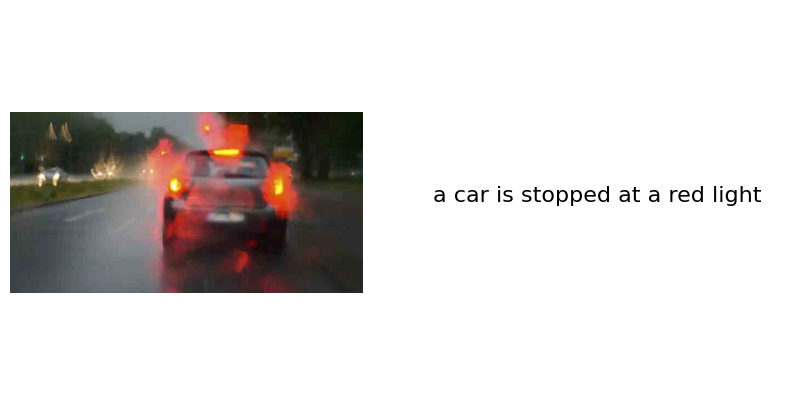

In [ ]:
def show_n_generate(image_path, greedy=True, model=model_raw):
    image = Image.open(image_path)
    pixel_values = image_processor(image, return_tensors="pt").pixel_values

    # Generate text
    if greedy:
        generated_ids = model.generate(pixel_values, max_new_tokens=25)
    else:
        generated_ids = model.generate(
            pixel_values,
            do_sample=True,
            max_new_tokens=10,
            top_k=10
        )
    generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Display image and text
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(np.asarray(image))
    ax[0].axis('off')
    ax[1].text(0, 0.5, generated_text, fontsize=16, wrap=True)
    ax[1].axis('off')
    plt.show()

show_n_generate('/content/drive/MyDrive/Colab Notebooks/images/red_traffic_light_1.jpg', greedy = True)
show_n_generate('/content/drive/MyDrive/Colab Notebooks/images/red_traffic_light_2.jpg', greedy = True)
show_n_generate('/content/drive/MyDrive/Colab Notebooks/images/traffic_jam_0.jpg', greedy = True)
show_n_generate('/content/drive/MyDrive/Colab Notebooks/images/traffic_jam_1.jpg', greedy = True)
show_n_generate('/content/drive/MyDrive/Colab Notebooks/images/car_breaking_0.jpg', greedy = True)
show_n_generate('/content/drive/MyDrive/Colab Notebooks/images/car_breaking_2.jpg', greedy = True)